# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm
import importlib
importlib.reload(nm)

<module 'nm_lib.nm_lib' from '/home/astronih/Documents/nm_lib/nm_lib/nm_lib.py'>

In [13]:
def h(x):
    ans = np.cos(np.pi*(x-1)/2)*np.exp(-((x-3)/2.5)**2)
    return ans

def dh(xx):
    """
    # Hand calculations were wrong
    u = np.cos(np.pi*(xx-1)/2)
    v = np.exp(-((xx-3)/2.5)**2)
    
    du = - np.pi/2 * np.sin(np.pi*(xx - 1)/2)
    dv = - 2*((xx-3)/2.5)*(1/2.5)*np.exp(- ((xx-3)/2.5)**2)
    
    ans = du*v + v*dv
    """
    # Wolfram alpha
    ans = np.exp( -0.16 * (-3 + xx)**2) * (1.5708 * np.cos((np.pi*xx) / 2) - (-0.96 + 0.32 * xx) * np.sin((np.pi * xx) / 2))
    return ans

In [14]:
nump = 65
x0 = -4.0
xf = 10.0

xx = np.arange(nump)/(nump - 1.0) * (xf-x0) + x0
y = nm.deriv_4tho(xx, h)

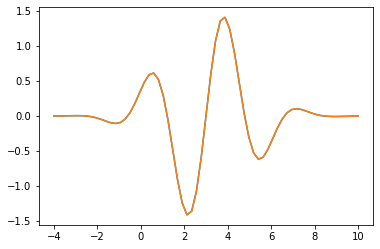

In [16]:
plt.plot(xx, y)
plt.plot(xx, dh(xx))

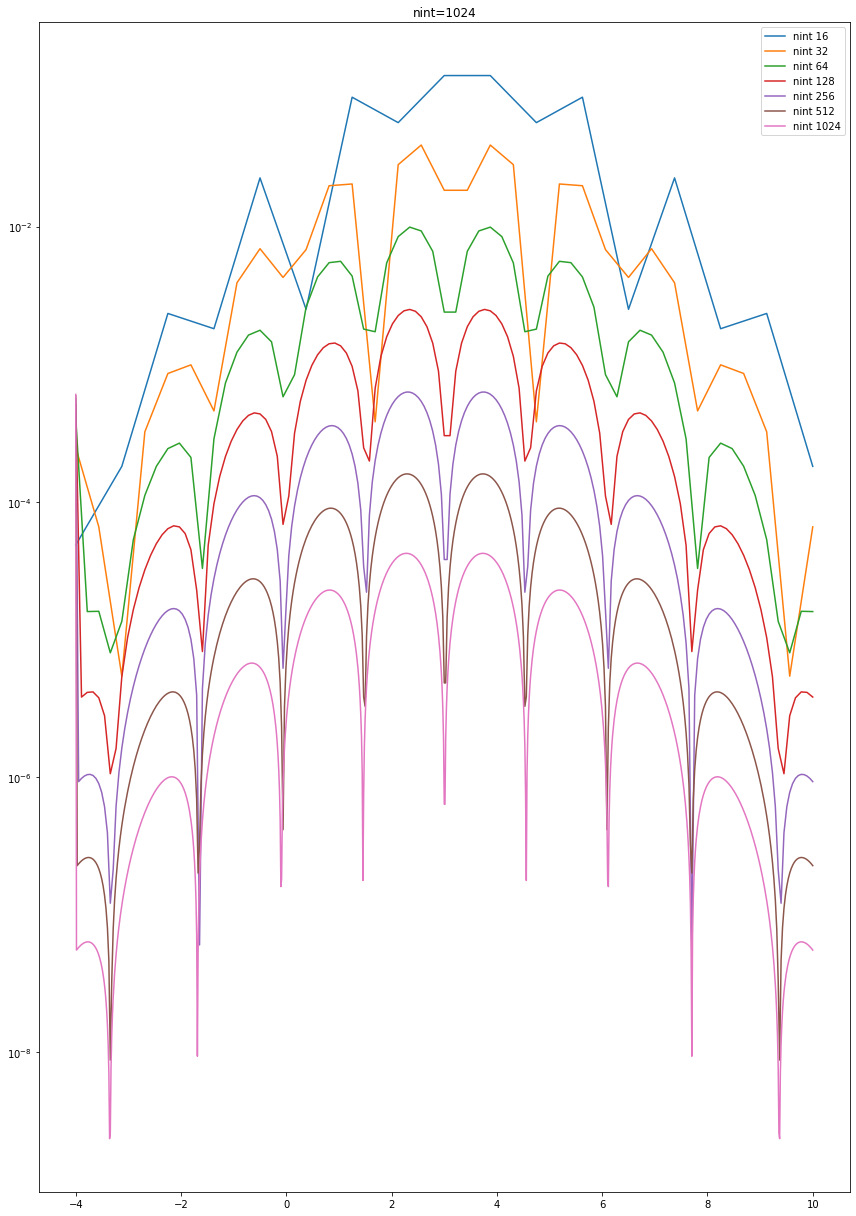

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 17))
l = 0
mean = []

for i in range(4, 11):
    nint = 2**i
    nump = nint + 1
    xx = np.arange(nump)/(nint) * (xf - x0) + x0
    
    dx = xx[1] - xx[0]

    y = nm.deriv_dnw(xx, h)
    y_exact = dh(xx-dx/2)
    
    mean.append(np.mean(abs(y-y_exact)))

    ax.set_title(f'nint={nint}')
    ax.semilogy(xx, abs(y-y_exact), label=f'nint {nint}')
    ax.legend()

plt.tight_layout()

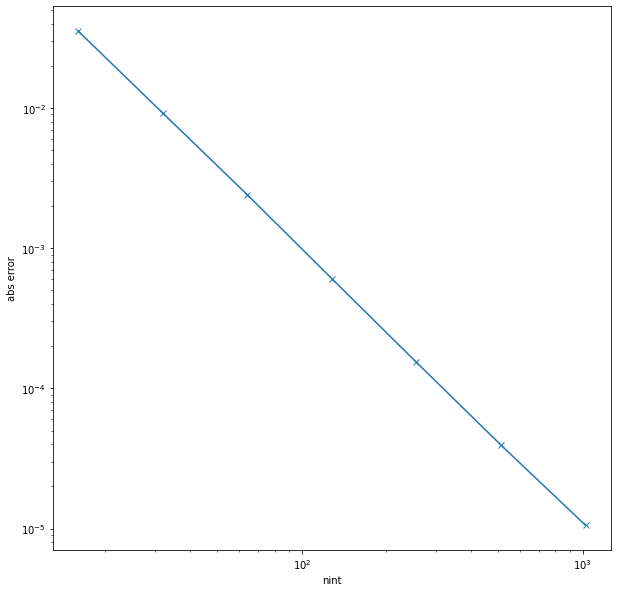

In [21]:

nint_list = [2**i for i in range(4, 11)]

fig = plt.figure(figsize=(10,10))
plt.ylabel('abs error')
plt.xlabel("nint")

plt.loglog(nint_list, mean, '-x')

## 2 - Precission

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128`. Explain the error slopes. 

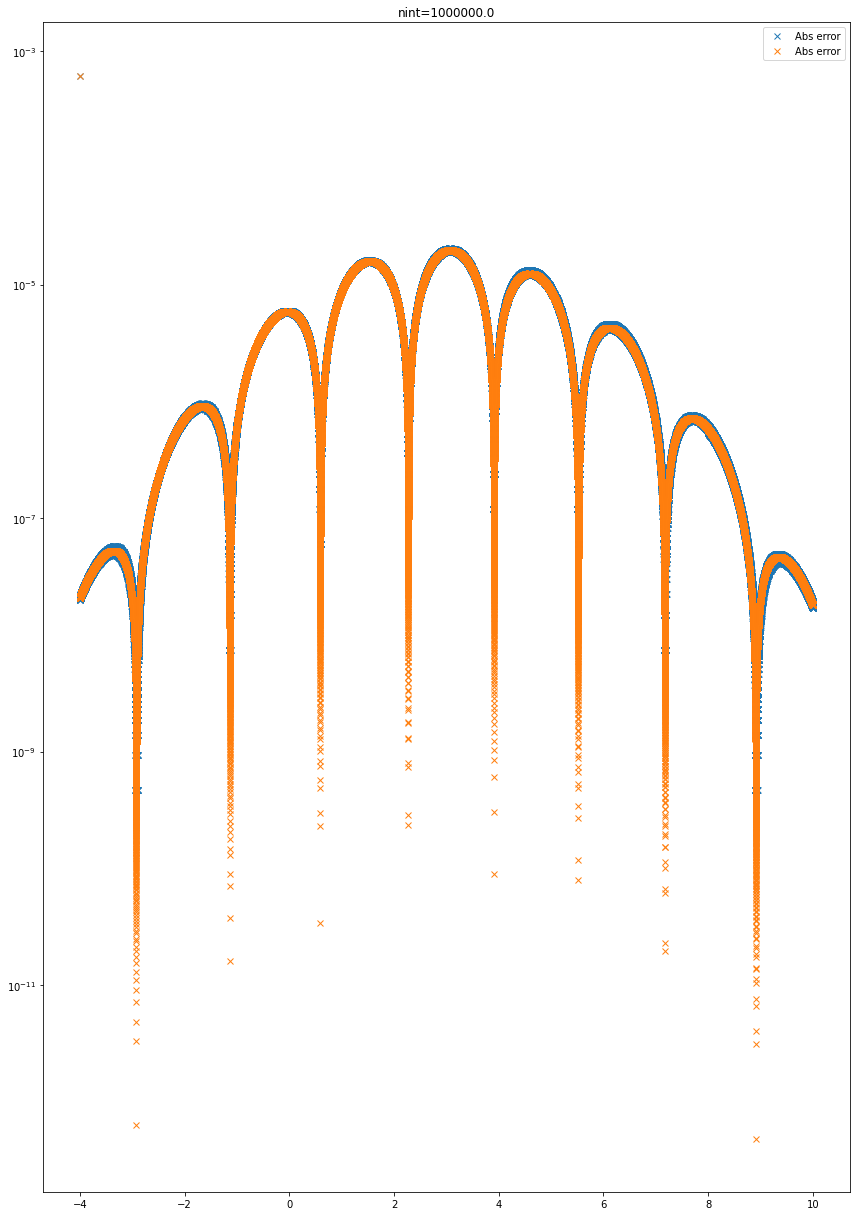

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 17))

nint = np.float32(1e6)
nump = np.float32(nint + 1)
xx = np.float32(np.arange(nump)/(nint) * (xf - x0) + x0)

dx = np.float32(xx[1] - xx[0])

y = np.float32(nm.deriv_dnw(xx, h))
y_exact = np.float32(dh(xx))

diff = np.abs(y-y_exact)

ax.set_title(f'nint={nint}')
ax.semilogy(xx, diff, 'x', label='Abs error')
    
nint_64 = np.float64(1e6)
nump_64 = np.float64(nint_64 + 1)
xx_64 = np.float64(np.arange(nump_64)/(nint_64) * (xf - x0) + x0)

dx_64 = np.float64(xx_64[1] - xx_64[0])

y_64 = np.float64(nm.deriv_dnw(xx_64, h))
y_exact_64 = np.float64(dh(xx_64))

diff_64 = np.abs(y_64-y_exact_64)

ax.semilogy(xx_64, diff_64, 'x', label='Abs error')
ax.legend()
    
plt.tight_layout()

In [38]:
z = np.polyfit(np.log10(dxs), np.log10(abs_err), deg=1)
p = np.poly1d(z)

z_64 = np.polyfit(np.log10(dxs_64), np.log10(abs_err_64), deg=1)
p_64 = np.poly1d(z_64)

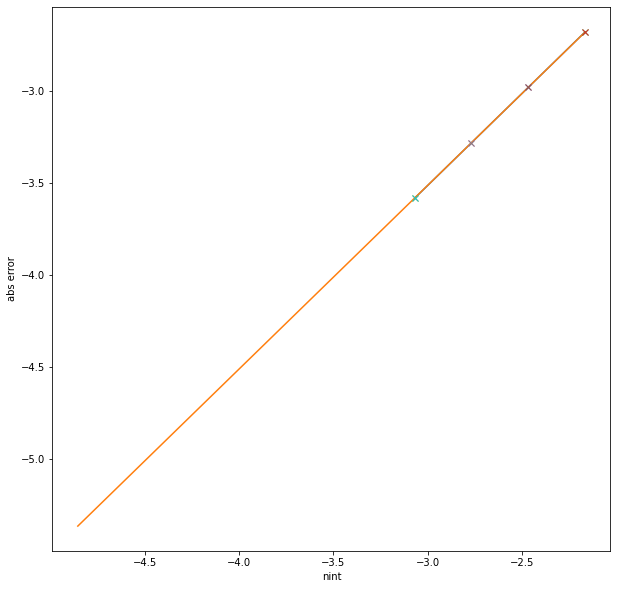

In [39]:
fig = plt.figure(figsize=(10,10))
plt.ylabel('abs error')
plt.xlabel("nint")
plt.plot(np.log10(dxs), p(np.log10(dxs)))
plt.plot(np.log10(dxs_64), p_64(np.log10(dxs_64)))
for i in range(4):
    plt.plot(np.log10(dxs[i]), np.log10(abs_err[i]), '-x')
    plt.plot(np.log10(dxs_64[i]), np.log10(abs_err_64[i]), '-x')